In [3]:
# Import libraries
import docx
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import scispacy
nlp = spacy.load("en_core_sci_lg")
from spacy import displacy
from spacy.matcher import Matcher, PhraseMatcher
from spacy.tokens import Doc, Span, Token
from summa import summarizer
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import benepar
from benepar.spacy_plugin import BeneparComponent
nlp.add_pipe(BeneparComponent("benepar_en2"))
import networkx as nx

In [14]:
text = 'Amorphous oxide semiconductors (AOSs)—ternary or quaternary oxides of post‐transition metals such as In‐Sn‐O, Zn‐Sn‐O, or In‐Ga‐Zn‐O—have been known for a decade and have attracted a great deal of attention as they possess several technological advantages, including low‐temperature large‐area deposition, mechanical flexibility, smooth surfaces, and high carrier mobility that is an order of magnitude larger than that of amorphous silicon (a‐Si:H). Compared to their crystalline counterparts, the structure of AOSs is extremely sensitive to deposition conditions, stoichiometry, and composition, giving rise to a wide range of tunable optical and electrical properties. The large parameter space and the resulting complex deposition–structure–property relationships in AOSs make the currently available theoretical and experimental research data rather scattered and the design of new materials difficult. In this work, the key properties of several In‐based AOSs are studied as a function of cooling rates, oxygen stoichiometry, cation composition, or lattice strain. Based on a thorough comparison of the results of ab initio modeling, comprehensive structural analysis, accurate property calculations, and systematic experimental measurements, a four‐dimensional parameter space for AOSs is derived, serving as a solid foundation for property optimization in known AOSs and for design of next‐generation transparent amorphous semiconductors.'

In [4]:
text2 = 'Self-organization is a property of dissipative nonlinear processes that are governed  by a global driving force and a local positive feedback  mechanism, which  createsregular geometric and/or temporal patterns, and decreases the entropy locally, in contrast torandom processes. Here we investigate for the first time a comprehensive number of self-organization processes that operate in planetary physics, solar physics, stellar physics,galactic physics, and cosmology. Self-organizing systems create spontaneous “order out of randomness”, during the evolution from an initially disordered system to an ordered quasi-stationary system, mostly by quasi-periodic limit-cycle dynamics, but also by harmonic (me-chanical or gyromagnetic) resonances. The global driving force can be due to gravity, elec-tromagnetic forces, mechanical forces (e.g., rotation or differential rotation), thermal pressure, or acceleration of nonthermal particles, while the positive feedback mechanism is often an instability, such as the magneto-rotational (Balbus-Hawley) instability, the convective(Rayleigh-Bénard) instability, turbulence, vortex attraction, magnetic reconnection, plasmacondensation, or a loss-cone instability. Physical models of astrophysical self-organizationprocesses require hydrodynamic, magneto-hydrodynamic (MHD), plasma, or N-body simu-lations. Analytical formulations of self-organizing systems generally involve coupled differential equations with limit-cycle solutions of the Lotka-Volterra or Hopf-bifurcation type.'

In [5]:
doc = nlp("This is a sentence.")
displacy.render(doc, style="dep")

In [6]:
doc = nlp(u"This is a sentence. It's never too late to do something.")
sent = list(doc.sents)[0]
print(sent._.parse_string)

#(S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))

(S (NP (DT This)) (VP (VBZ is) (NP (DT a) (NN sentence))) (. .))


In [7]:
doc = nlp(text)
sents = list(doc.sents)

In [7]:
# Get strucutre information from parantheses
def parenthetic_contents(string):
    """Generate parenthesized contents in string as pairs (level, contents).
    
    Inputs: string of text with parantheses
    Output: tuples with level and contents
    
    Ref: https://stackoverflow.com/questions/4284991/
    parsing-nested-parentheses-in-python-grab-content-by-level
    """
    stack = []
    for i, c in enumerate(string):
        if c == '(':
            stack.append(i)
        elif c == ')' and stack:
            start = stack.pop()
            yield (len(stack), string[start + 1: i])
            

In [8]:
def get_sent_vp(parsed_sent):
    '''
    Function to get the main VP of a sentence that is 
    parsed in parantheses format.
    
    Inputs: List of tuples
    Output: String in parantheses
    '''
    for element in parsed_sent:
        if 1 in element:
            if element[1][0:2]=='VP':
                return element[1]

In [10]:
sent_vps = []

for sent in sents:
    sent_vp = get_sent_vp(list(parenthetic_contents(sent._.parse_string)))
    sent_vps.append(sent_vp)

In [11]:
sub_sent_vps = []
for sent_vp in sent_vps:
    sub_sent_vp = list(parenthetic_contents(sent_vp))
    sub_sent_vps.append(sub_sent_vp)

In [12]:
for sub_sent_vp in sub_sent_vps[1:2]:
    for sub_sent in sub_sent_vp:
        if sub_sent[0] == 0:
            print(sub_sent)

(0, 'VBZ is')
(0, 'ADJP (RB extremely) (JJ sensitive) (PP (TO to) (NP (NP (NN deposition) (NNS conditions)) (, ,) (NP (NN stoichiometry)) (, ,) (CC and) (NP (NN composition))))')
(0, ', ,')
(0, 'S (VP (VBG giving) (NP (NN rise)) (PP (TO to) (NP (NP (DT a) (JJ wide) (NN range)) (PP (IN of) (NP (JJ tunable) (ADJP (JJ optical) (CC and) (JJ electrical)) (NNS properties))))))')


In [13]:
for sub_sent_vp in sub_sent_vps[2:3]:
    for sub_sent in sub_sent_vp:
        if sub_sent[0] == 0:
            print(sub_sent)

(0, 'VBP make')
(0, 'S (S (NP (DT the) (ADJP (ADJP (RB currently) (JJ available)) (UCP (JJ theoretical) (CC and) (JJ experimental))) (NN research) (NNS data)) (ADJP (RB rather) (VBN scattered))) (CC and) (S (NP (NP (DT the) (NN design)) (PP (IN of) (NP (JJ new) (NNS materials)))) (ADJP (JJ difficult)))')


In [14]:
for sub_sent_vp in sub_sent_vps[3:4]:
    for sub_sent in sub_sent_vp:
        if sub_sent[0] == 0:
            print(sub_sent)

(0, 'VBP are')
(0, 'VP (VBN studied) (PP (IN as) (NP (NP (DT a) (NN function)) (PP (IN of) (NP (NP (VBG cooling) (NNS rates)) (, ,) (NP (NN oxygen) (NN stoichiometry)) (, ,) (NP (NN cation) (NN composition)) (, ,) (CC or) (NP (NN lattice) (NN strain))))))')


In [15]:
for sub_sent_vp in sub_sent_vps[4:5]:
    for sub_sent in sub_sent_vp:
        if sub_sent[0] == 0:
            print(sub_sent)

(0, 'VBZ is')
(0, 'VP (VBN derived) (, ,) (S (VP (VBG serving) (PP (IN as) (NP (NP (DT a) (JJ solid) (NN foundation)) (PP (PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))) (CC and) (PP (IN for) (NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors))))))))))')


In [46]:
edges = []
next_subs = []
for sub_sent_vp in sub_sent_vps[4:5]:
    for sub_sent in sub_sent_vp:
        if sub_sent[0] == 0 and sub_sent[1][0:2] == 'VB':
            edges.append(sub_sent[1])
        elif sub_sent[0] == 0 and sub_sent[1][0:2] != 'VB':
            next_subs.append(sub_sent[1])

In [47]:
print(edges)

['VBZ is']


In [71]:
next_nodes = []
for sub in next_subs:
    strng = list(parenthetic_contents(sub))
    for level in strng:
        if level[0] == 0:
            if level[1][0:1] != 'S' or ', ,' not in level[1]:
                print(level[1])

VBN derived
S (VP (VBG serving) (PP (IN as) (NP (NP (DT a) (JJ solid) (NN foundation)) (PP (PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))) (CC and) (PP (IN for) (NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors)))))))))


In [17]:
string = sent._.parse_string

In [9]:
# Get main noun phrase for a sentence
def get_sent_np(parsed_sent):
    '''
    Function to get the main NP of a sentence that is 
    parsed in parantheses format.
    
    Inputs: List of tuples
    Output: String in parantheses
    '''
    for element in parsed_sent:
        if 1 in element:
            if element[1][0:2]=='NP':
                return element[1]

In [19]:
parsed_sent = list(parenthetic_contents(string))

In [20]:
sent_np = get_sent_np(parsed_sent)
print(sent_np)

NP (NP (DT a) (JJ four‐dimensional) (NN parameter) (NN space)) (PP (IN for) (NP (NNP AOSs)))


In [21]:
sent_vp = get_sent_vp(parsed_sent)
print(sent_vp)

VP (VBZ is) (VP (VBN derived) (, ,) (S (VP (VBG serving) (PP (IN as) (NP (NP (DT a) (JJ solid) (NN foundation)) (PP (PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))) (CC and) (PP (IN for) (NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors)))))))))))


In [22]:
subs_of_vp = list(parenthetic_contents(sent_vp))

subs_of_vp[0][1]

'VBZ is'

In [23]:
np_in_vp = []
for element in subs_of_vp:
    if 0 in element:
        if 'NP' in element[1]:
            np_in_vp.append(element[1])
            print(element[1])

VP (VBN derived) (, ,) (S (VP (VBG serving) (PP (IN as) (NP (NP (DT a) (JJ solid) (NN foundation)) (PP (PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))) (CC and) (PP (IN for) (NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors))))))))))


In [24]:
subs_of_vp = list(parenthetic_contents(np_in_vp[0]))
print(subs_of_vp)

[(0, 'VBN derived'), (0, ', ,'), (2, 'VBG serving'), (3, 'IN as'), (5, 'DT a'), (5, 'JJ solid'), (5, 'NN foundation'), (4, 'NP (DT a) (JJ solid) (NN foundation)'), (6, 'IN for'), (8, 'NN property'), (8, 'NN optimization'), (7, 'NP (NN property) (NN optimization)'), (8, 'IN in'), (9, 'VBN known'), (9, 'NNP AOSs'), (8, 'NP (VBN known) (NNP AOSs)'), (7, 'PP (IN in) (NP (VBN known) (NNP AOSs))'), (6, 'NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs)))'), (5, 'PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))'), (5, 'CC and'), (6, 'IN for'), (8, 'NN design'), (7, 'NP (NN design)'), (8, 'IN of'), (9, 'NN next‐generation'), (9, 'JJ transparent'), (9, 'JJ amorphous'), (9, 'NNS semiconductors'), (8, 'NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors)'), (7, 'PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors))'), (6, 'NP (NP (NN design)) (PP (IN of) (NP (NN n

In [25]:
np_in_vp = []
for element in subs_of_vp:
    if 0 in element:
        if 'NP' in element[1]:
            np_in_vp.append(element[1])
            print(element[1])

S (VP (VBG serving) (PP (IN as) (NP (NP (DT a) (JJ solid) (NN foundation)) (PP (PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))) (CC and) (PP (IN for) (NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors)))))))))


In [26]:
list(parenthetic_contents(np_in_vp[0]))

[(1, 'VBG serving'),
 (2, 'IN as'),
 (4, 'DT a'),
 (4, 'JJ solid'),
 (4, 'NN foundation'),
 (3, 'NP (DT a) (JJ solid) (NN foundation)'),
 (5, 'IN for'),
 (7, 'NN property'),
 (7, 'NN optimization'),
 (6, 'NP (NN property) (NN optimization)'),
 (7, 'IN in'),
 (8, 'VBN known'),
 (8, 'NNP AOSs'),
 (7, 'NP (VBN known) (NNP AOSs)'),
 (6, 'PP (IN in) (NP (VBN known) (NNP AOSs))'),
 (5,
  'NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs)))'),
 (4,
  'PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))'),
 (4, 'CC and'),
 (5, 'IN for'),
 (7, 'NN design'),
 (6, 'NP (NN design)'),
 (7, 'IN of'),
 (8, 'NN next‐generation'),
 (8, 'JJ transparent'),
 (8, 'JJ amorphous'),
 (8, 'NNS semiconductors'),
 (7,
  'NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors)'),
 (6,
  'PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors))'),
 (5,
  'NP (NP (NN design)) (PP (IN of) (NP

In [27]:
subs_of_vp = list(parenthetic_contents(np_in_vp[0]))
print(subs_of_vp)

[(1, 'VBG serving'), (2, 'IN as'), (4, 'DT a'), (4, 'JJ solid'), (4, 'NN foundation'), (3, 'NP (DT a) (JJ solid) (NN foundation)'), (5, 'IN for'), (7, 'NN property'), (7, 'NN optimization'), (6, 'NP (NN property) (NN optimization)'), (7, 'IN in'), (8, 'VBN known'), (8, 'NNP AOSs'), (7, 'NP (VBN known) (NNP AOSs)'), (6, 'PP (IN in) (NP (VBN known) (NNP AOSs))'), (5, 'NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs)))'), (4, 'PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))'), (4, 'CC and'), (5, 'IN for'), (7, 'NN design'), (6, 'NP (NN design)'), (7, 'IN of'), (8, 'NN next‐generation'), (8, 'JJ transparent'), (8, 'JJ amorphous'), (8, 'NNS semiconductors'), (7, 'NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors)'), (6, 'PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors))'), (5, 'NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent)

In [28]:
np_in_vp = []
for element in subs_of_vp:
    if 0 in element:
        if 'NP' in element[1]:
            np_in_vp.append(element[1])
            print(element[1])

VP (VBG serving) (PP (IN as) (NP (NP (DT a) (JJ solid) (NN foundation)) (PP (PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))) (CC and) (PP (IN for) (NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors))))))))


In [29]:
np_in_vp[0]

'VP (VBG serving) (PP (IN as) (NP (NP (DT a) (JJ solid) (NN foundation)) (PP (PP (IN for) (NP (NP (NN property) (NN optimization)) (PP (IN in) (NP (VBN known) (NNP AOSs))))) (CC and) (PP (IN for) (NP (NP (NN design)) (PP (IN of) (NP (NN next‐generation) (JJ transparent) (JJ amorphous) (NNS semiconductors))))))))'

In [30]:
get_top_np(np_in_vp[0])

NameError: name 'get_top_np' is not defined

In [10]:
# Get main subject for a sentence
def get_top_np(string):
    '''
    Recursive function to get the top most NP from
    the main NP of a sentence.
    
    Inputs: String of main NP in a sentence
    Output: Top most NP of a sentence in string format
    '''
    
    # Base case
    if string.count('NP') == 1:
        return string
    
    # Generate tuples from parantheses
    contents = parenthetic_contents(string)

    # Get top most NP    
    for element in contents:
        if 0 in element:
            return get_top_np(element[1])


In [11]:
def get_words(string):
    '''
    Function to get the words from a string with POS and
    words in parantheses.
    
    Inputs: String of POS and words in tuples.
    Output: String of words in lowercase
    '''
    
    # Create list of tuples
    parsed_string = list(parenthetic_contents(string))
    
    # Collect and format words
    words = ''
    for node in parsed_string:
        words += ' ' + node[1].split(' ')[1]
    return words[1:].lower()

In [33]:
get_top_np(sent_np)

'NP (DT a) (JJ four‐dimensional) (NN parameter) (NN space)'

In [34]:
sent

Based on a thorough comparison of the results of ab initio modeling, comprehensive structural analysis, accurate property calculations, and systematic experimental measurements, a four‐dimensional parameter space for AOSs is derived, serving as a solid foundation for property optimization in known AOSs and for design of next‐generation transparent amorphous semiconductors.

## Get the main nodes of a paragraph
Here the subject of each setence is a node.

In [12]:
def get_nodes(text):
    '''
    Function that finds the main NP of each paragraph and
    returns them in a list to be used as nodes.
    
    Inputs: string of paragraph text
    Output: list of nodes
    '''
    
    # Create spacy doc
    doc = nlp(text)
    
    # Get sentences as list
    sentences = list(doc.sents)
    
    # Initiate list of nodes
    nodes = []
    
    for sentence in sentences:
        string = sentence._.parse_string
        parsed_sent = list(parenthetic_contents(string))
        sent_np = get_sent_np(parsed_sent)
        nodes.append(get_words(get_top_np(sent_np)))
    
    return nodes

In [ ]:
nodes = get_nodes(text)

In [31]:
nodes

['amorphous oxide semiconductors',
 'the structure',
 'the large parameter space',
 'the key properties',
 'a four‐dimensional parameter space']

## Make simple graph using nodes

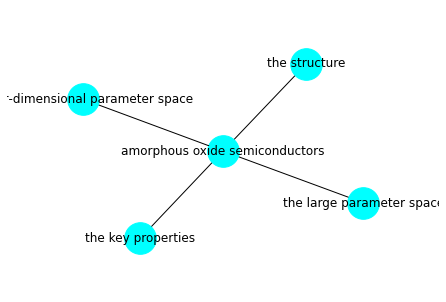

In [32]:
G = nx.Graph()

G=nx.Graph()

# adding a list of nodes
G.add_nodes_from([1,2,3,4,5])

# adding a list of edges:
G.add_edges_from([(1,2), (1,3), (1,4), (1,5)])

labels = {1:nodes[0], 2:nodes[1], 3:nodes[2], 4:nodes[3], 5:nodes[4]}
nx.draw(G, node_size=1000, node_color='cyan', labels=labels, with_labels=True)


plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.4*x for x in axis.get_xlim()])
axis.set_ylim([1.5*y for y in axis.get_ylim()])
#plt.tight_layout()


plt.savefig("simple_path.png", dpi=300, bbox_inches='tight') # save as png
plt.show() # display

## Get Main Nodes per Paragrah on Perovskite Literature

In [4]:
# Make list of papers
files = os.listdir('papers/')[1:]
print(files)

['adfm.201901476.docx', 'Bush et al. - 2017 - 23.6%-Efficient Monolithic PerovskiteSilicon Tandem Solar Cells With Improved Stability.docx', 'Celik et al. - 2017 - Environmental analysis of perovskites and other relevant solar cell technologies in a tandem configuration.docx', 'Dunfield et al. - 2018 - Curtailing Perovskite Processing Limitations via Lamination at the PerovskitePerovskite Interface.docx', 'Eperon, Hörantner, Snaith - 2017 - Metal halide perovskite tandem and multiple-junction photovoltaics.docx', 'Esperon et al. - 2016 - Perovskite-perovskite tandem photovoltaics with optimized band gaps.docx', 'Han et al. - 2018 - High-performance perovskiteCu(In,Ga)Se2 monolithic tandem solar cells.docx', 'Lin et al. - Unknown - Monolithic all-perovskite tandem solar cells with 24.8% efficiency exploiting comproportionation to suppress Sn(i.docx', 'Sofia et al. - 2018 - Economic viability of thin-film tandem solar modules in the United States.docx', 'Yu, Carpenter, Holman - 2018 - Te

In [5]:
# Make dictionary of papers
doc_names = ['doc_{}'.format(i) for i in range(len(files))]
doc_dict = {}

for i in range(len(files)):
    doc = docx.Document("papers/"+files[i])
    doc_dict[doc_names[i]] = [p.text for p in doc.paragraphs if len(p.text) > 150]

In [6]:
doc_dict[doc_names[0]]

['César Omar Ramírez Quiroz,* George D. Spyropoulos, Michael Salvador, Loïc M. Roch, Marvin Berlinghof, José Darío Perea, Karen Forberich, Laura-Isabelle Dion-Bertrand, Nadine J. Schrenker, Andrej Classen, Nicola Gasparini, Ganna Chistiakova, Mathias Mews, Lars Korte, Bernd Rech, Ning Li, Frank Hauke, Erdmann Spiecker, Tayebeh Ameri, Steve Albrecht, Gonzalo Abellán, Salvador León, Tobias Unruh, Andreas Hirsch, Alán Aspuru-Guzik, and Christoph J. Brabec',
 'A multipurpose interconnection layer based on poly(3,4-ethylenedioxythio-phene) doped with poly(styrene sulfonate) (PEDOT:PSS), and d-sorbitol for monolithic perovskite/silicon tandem solar cells is introduced. The inter-connection of independently processed silicon and perovskite subcells is a simple add-on lamination step, alleviating common fabrication complexities of tandem devices. It is demonstrated experimentally and theoretically that PEDOT:PSS is an ideal building block for manipulating the mechanical and electrical function

## Manual parsing using parantheses 

In [33]:
# 0 sentence
(S 
 (NP 
  (NP 
   (NP (JJ Amorphous) (NN oxide) (NNS semiconductors)) 
   (JJ (AOSs)—ternary) 
   (CC or) 
   (JJ quaternary) 
   (NNS oxides)
  ) 
  (PP (IN of) (NP (NP (NN post‐transition) (NNS metals)) 
               (PP (JJ such) (IN as) 
                (NNP In‐Sn‐O) (, ,) 
                (NNP Zn‐Sn‐O) (, ,) 
                (CC or) 
                (NP (NNP In‐Ga‐Zn‐O)) (, —)
               )
              )
  )
 )
 
 (VP 
  (VP (VBP have) (VP (VBN been) (VP (VBN known) (PP (IN for) (NP (DT a) (NN decade)))))) 
  (CC and) 
  (VP 
   (VBP have) 
   (VP 
    (VBN attracted) 
    (NP (NP (DT a) (JJ great) (NN deal)) (PP (IN of) (NP (NN attention))))
    (SBAR 
     (IN as) 
     (S 
      (NP (PRP they)) 
      (VP (VBP possess) 
       (NP 
        (NP (JJ several) (JJ technological) (NNS advantages)) (, ,) 
        (PP 
         (VBG including) 
         (NP (NP (NN low‐temperature)) (NN large‐area) (NN deposition)) (, ,) 
         (NP (JJ mechanical) (NN flexibility)) (, ,) 
         (NP (JJ smooth) (NNS surfaces)) (, ,) 
         (CC and) 
         (NP 
          (NP (JJ high) (NN carrier) (NN mobility)) 
          (SBAR 
           (WHNP (WDT that)) 
           (S 
            (VP 
             (VBZ is) 
             (ADJP 
              (ADJP 
               (NP (DT an) (NN order)) 
               (PP (IN of) (NP (NN magnitude))) 
               (ADJP (JJR larger))
              ) 
              (PP 
               (IN than) 
               (NP 
                (NP (DT that)) 
                (PP 
                 (IN of) 
                 (NP 
                  (NP (JJ amorphous) (NN silicon)) 
                  (PRN 
                   (-LRB- -LRB-) 
                   (NP (JJ a‐Si) (. :) (NN H))
                   (-RRB- -RRB-)
                  )
                 )
                )
               )
              )
             )
            )
           )
          )
         )
        )
       )
      )
     )
    )
   )
  )
 ) 
 (. .)
)

SyntaxError: invalid syntax (<ipython-input-33-831865185e46>, line 5)

In [ ]:
# 1 sentence
(S 
 (PP (VBN Compared) (PP (TO to) (NP (PRP$ their) (JJ crystalline) (NNS counterparts)))) (, ,) 
 (NP (NP (DT the) (NN structure)) (PP (IN of) (NP (NNP AOSs)))) 
 (VP (VBZ is) 
  (ADJP (RB extremely) (JJ sensitive) 
               (PP (TO to) (NP 
                            (NP (NN deposition) (NNS conditions)) (, ,) 
                            (NP (NN stoichiometry)) (, ,) (CC and) 
                            (NP (NN composition))))) (, ,) 
  (S (VP (VBG giving) (NP (NN rise)) 
      (PP (TO to) (NP (NP (DT a) (JJ wide) (NN range)) 
                   (PP (IN of) 
                    (NP (JJ tunable) (ADJP (JJ optical) (CC and) (JJ electrical)) (NNS properties))
                   )
                  )
      )
     )
  )
 ) 
 (. .)
)

